In [20]:
import numpy as np
import cv2 as cv

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Convolution2D, Flatten, Dense

In [14]:
data = np.load('Final_data.npy')

imgs = data[0]
steering = data[1]


x_train, x_test, y_train, y_test = train_test_split(imgs, steering, test_size = 0.2)

In [15]:
len(x_test) + len(x_train) == len(data[0])

True

In [16]:
def batch_generator(imgs,steering,batch_size):
       
    while True:
        x = []
        y = []
        
        for i in range(batch_size):
    
            index = np.random.randint(0,len(imgs)-1)    
            img = cv.imread(imgs[index])
            
            img = cv.cvtColor(img,cv.COLOR_BGR2YUV)
            img = img[60:135,:,:]
            
            img = cv.resize(img, [200,66])
            
            
            if (np.random.rand() > 0.5):

                brightness_cont = np.random.randint(1,4)
                img = img/brightness_cont
                
                
            if (np.random.rand() > 0.5):

                img = cv.flip(img,1)
                steering_angle = -float(steering[index])
                
            else:
                steering_angle = float(steering[index])
                

            x.append(img)
            y.append(steering_angle)
            
        x = np.array(x)
        y = np.array(y)
        
        yield x,y
    

In [17]:
model = Sequential()

model.add(Convolution2D(24, (5,5), strides = (2,2), input_shape = (66,200,3), activation = 'elu'))
model.add(Convolution2D(36, (5,5), strides = (2,2), activation = 'elu'))
model.add(Convolution2D(48, (5,5), strides = (2,2), activation = 'elu'))

model.add(Convolution2D(64, (3,3), activation = 'elu'))
model.add(Convolution2D(64, (3,3), activation = 'elu'))

model.add(Flatten())

model.add(Dense(100, activation = 'elu'))
model.add(Dense(50, activation = 'elu'))
model.add(Dense(10, activation = 'elu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)              

In [19]:
history = model.fit(batch_generator(x_train, y_train, 51), steps_per_epoch = 300, epochs = 10, validation_data = batch_generator(x_test, y_test,64), validation_steps =200)

Epoch 1/10
300/300 [==============================] - 126s 418ms/step - loss: 0.9811 - accuracy: 0.3922 - val_loss: 0.0901 - val_accuracy: 0.3746
Epoch 2/10
300/300 [==============================] - 120s 400ms/step - loss: 0.0823 - accuracy: 0.3908 - val_loss: 0.0797 - val_accuracy: 0.3808
Epoch 3/10
300/300 [==============================] - 124s 414ms/step - loss: 0.0739 - accuracy: 0.3925 - val_loss: 0.0822 - val_accuracy: 0.3770
Epoch 4/10
300/300 [==============================] - 119s 397ms/step - loss: 0.0654 - accuracy: 0.3901 - val_loss: 0.0756 - val_accuracy: 0.3766
Epoch 5/10
300/300 [==============================] - 123s 412ms/step - loss: 0.0586 - accuracy: 0.3935 - val_loss: 0.0735 - val_accuracy: 0.3802
Epoch 6/10
300/300 [==============================] - 95s 317ms/step - loss: 0.0510 - accuracy: 0.4010 - val_loss: 0.0763 - val_accuracy: 0.3864
Epoch 7/10
300/300 [==============================] - 90s 299ms/step - loss: 0.0438 - accuracy: 0.3925 - val_loss: 0.0781 - v

In [21]:
history.history['loss']

[0.9810619354248047,
 0.0823417603969574,
 0.07388722896575928,
 0.06535743921995163,
 0.05856718868017197,
 0.050985999405384064,
 0.043775323778390884,
 0.03309154137969017,
 0.025768626481294632,
 0.01741650141775608]

In [ ]:
history.history['val_loss']

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

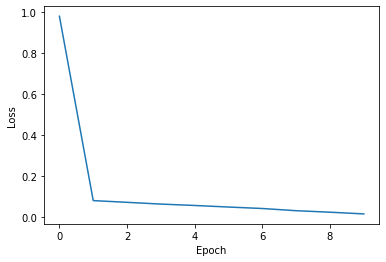

In [23]:
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

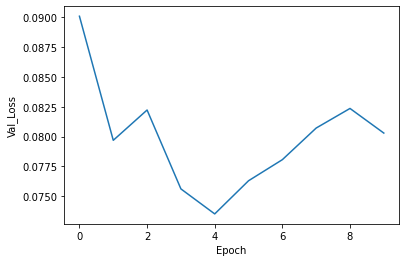

In [24]:
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Val_Loss")
plt.imshow

In [25]:
model.save('12_Epoch_Model.h5')

In [26]:
model = load_model('12_Epoch_Model.h5')

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)              